In [1]:
path = 'bitly_usagov.txt'

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [7]:
import json
path = 'bitly_usagov.txt'
records = [json.loads(line) for line in open(path)]

In [8]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [9]:
records[0]['tz']

'America/New_York'

In [13]:
print(records[0]['tz'])

America/New_York


In [14]:
time_zones = [rec['tz']for rec in records]

KeyError: 'tz'

In [16]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [17]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [18]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] +=1 
        else:
            counts[x] =1
    return counts

In [20]:
from collections import defaultdict
def get_counts(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] +=1
    return counts


In [21]:
counts = get_counts(time_zones)

In [22]:
counts['America/New_York']

1251

In [23]:
len(time_zones)

3440

In [24]:
def top_counts(count_dict,n=10):
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [25]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [26]:
from collections import Counter

In [27]:
counts = Counter(time_zones)

In [28]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

用pandas对时区进行计数


In [29]:
from pandas import DataFrame, Series

In [30]:
import pandas as pd; import numpy as np

In [31]:
frame = DataFrame(records)

In [32]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [33]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [34]:
tz_counts = frame['tz'].value_counts()

In [35]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [39]:
clean_tz = frame['tz'].fillna('Missing')

In [40]:
clean_tz[clean_tz == ''] = 'Unknown'

In [41]:
tz_counts = clean_tz.value_counts()

In [43]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [44]:
tz_counts[:10].plot(kind='barh',rot=0)

In [47]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [48]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [49]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [50]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [51]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [52]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [54]:
cframe = frame[frame.a.notnull()]

In [55]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Window')

In [56]:
operating_system[:5]

array(['Windows', 'Not Window', 'Windows', 'Not Window', 'Windows'],
      dtype='<U10')

In [57]:
by_tz_os = cframe.groupby(['tz',operating_system])

In [58]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [59]:
agg_counts[:10]

,Not Window,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [60]:
indexer = agg_counts.sum(1).argsort()

In [62]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [65]:
count_subset = agg_counts.take(indexer)[-10:]

In [66]:
count_subset

,Not Window,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


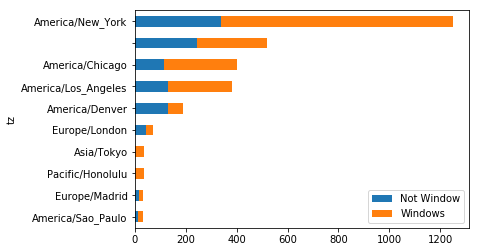

In [67]:
count_subset.plot(kind='barh',stacked = True)

In [68]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)

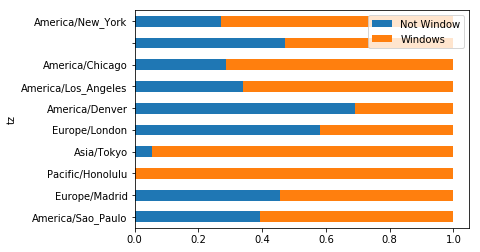

In [69]:
normed_subset.plot(kind='barh',stacked = True)

In [77]:
import pandas as pd
unames = ['user_id','gender','age','occupation','zip']

In [82]:
users = pd.read_csv('users.dat',sep='::',header=None,names=unames)
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('ratings.dat',sep='::',header = None,names = rnames)
mnames = ['movie_id','title','genres']
movies = pd.read_table('movies.dat',sep='::',header = None,names = mnames)

C:\Users\24225\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


FileNotFoundError: [Errno 2] No such file or directory: 'users.dat'

In [90]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat.txt', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat.txt', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat.txt', sep='::', header=None, names=mnames)

C:\Users\24225\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
C:\Users\24225\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


FileNotFoundError: [Errno 2] No such file or directory: 'ml-1m/users.dat.txt'

In [93]:
import sys
sys.path

['',
 'C:\\Users\\24225\\Anaconda\\envs\\tfenv',
 'C:\\Users\\24225\\Anaconda\\envs\\tfenv\\Lib',
 'C:\\Users\\24225\\Anaconda\\envs\\tfenv\\Lib\\site-packages',
 'C:\\Users\\24225\\Anaconda\\envs\\tfenv\\Lib\\site-packages\\keras',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\python36.zip',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\DLLs',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\lib',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\lib\\site-packages',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\Sphinx-1.6.3-py3.6.egg',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\24225\\.ipython']

In [94]:
sys.path("C:\\Users\\24225\\pydata-notebook-master\\datasets\\babynames")

TypeError: 'list' object is not callable

In [95]:
sys.path.append("C:\\Users\\24225\\pydata-notebook-master\\datasets\\babynames")

In [96]:
sys.path

['',
 'C:\\Users\\24225\\Anaconda\\envs\\tfenv',
 'C:\\Users\\24225\\Anaconda\\envs\\tfenv\\Lib',
 'C:\\Users\\24225\\Anaconda\\envs\\tfenv\\Lib\\site-packages',
 'C:\\Users\\24225\\Anaconda\\envs\\tfenv\\Lib\\site-packages\\keras',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\python36.zip',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\DLLs',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\lib',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\lib\\site-packages',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\Sphinx-1.6.3-py3.6.egg',
 'C:\\Users\\24225\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\24225\\.ipython',
 'C:\\Users\\24225\\pydata-notebook-master\\datasets\\babynames']

In [105]:
#import pandas as pd
#df = pd.read_table('yob1880.txt')
import pandas as pd
df= pd.read_table('yob1880.txt',sep='\s+')
print("df:")
print(df)


df:
           Mary,F,7065
0          Anna,F,2604
1          Emma,F,2003
2     Elizabeth,F,1939
3        Minnie,F,1746
4      Margaret,F,1578
5           Ida,F,1472
6         Alice,F,1414
7        Bertha,F,1320
8         Sarah,F,1288
9         Annie,F,1258
10        Clara,F,1226
11         Ella,F,1156
12     Florence,F,1063
13         Cora,F,1045
14       Martha,F,1040
15        Laura,F,1012
16        Nellie,F,995
17         Grace,F,982
18        Carrie,F,949
19         Maude,F,858
20         Mabel,F,808
21        Bessie,F,794
22        Jennie,F,793
23      Gertrude,F,787
24         Julia,F,783
25        Hattie,F,769
26         Edith,F,768
27        Mattie,F,704
28          Rose,F,700
29     Catherine,F,688
...                ...
1969         Philo,M,5
1970       Phineas,M,5
1971       Presley,M,5
1972        Ransom,M,5
1973         Reece,M,5
1974          Rene,M,5
1975       Roswell,M,5
1976       Rowland,M,5
1977       Sampson,M,5
1978        Samual,M,5
1979        Santos,M,5
1980   

C:\Users\24225\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


In [106]:
df.head(10)

,"Mary,F,7065"
0,"Anna,F,2604"
1,"Emma,F,2003"
2,"Elizabeth,F,1939"
3,"Minnie,F,1746"
4,"Margaret,F,1578"
5,"Ida,F,1472"
6,"Alice,F,1414"
7,"Bertha,F,1320"
8,"Sarah,F,1288"
9,"Annie,F,1258"


In [107]:
df= pd.read_csv('yob1880.txt',names = ['name','sex','births'])

In [108]:
df

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [109]:
df.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [110]:
years = range(1880,2011)

In [111]:
pieces = []

In [112]:
columns = ['name','sex','births']

In [113]:
for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path,names = columns)
    frame['year']= year
    pieces.append(frame)
    

In [114]:
names = pd.concat(pieces,ignore_index = True)

In [115]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [118]:
total_births = pd.pivot_table(names,index = 'year',columns = 'sex',aggfunc=sum)

In [120]:
total_births

births         
sex         F        M
year                  
1880    90993   110493
1881    91955   100748
1882   107851   113687
1883   112322   104632
1884   129021   114445
1885   133056   107802
1886   144538   110785
1887   145983   101412
1888   178631   120857
1889   178369   110590
1890   190377   111026
1891   185486   101198
1892   212350   122038
1893   212908   112319
1894   222923   115775
1895   233632   117398
1896   237924   119575
1897   234199   112760
1898   258771   122703
1899   233022   106218
1900   299873   150554
1901   239351   106478
1902   264079   122660
1903   261976   119240
1904   275375   128129
1905   291641   132319
1906   295301   133159
1907   318558   146838
1908   334277   154339
1909   347191   163983
...       ...      ...
1981  1666833  1789568
1982  1692036  1812642
1983  1669486  1790670
1984  1682396  1802735
1985  1719450  1846162
1986  1714053  1839442
1987  1737508  1865113
1988  1779112  1911858
1989  1843057  1999840
1990  1897256  2052070
1991  1874110  2019018
1992  1842818  1995760
1993  1807795  1959712
1994  1784407  1930363
1995  1757240  1902100
1996  1751681  1892700
1997  1739331  1883571
1998  1765390  1909676
1999  1772139  1918267
2000  1813960  1961702
2001  1798284  1940498
2002  1794358  1938941
2003  1824406  1972439
2004  1833005  1981557
2005  1843890  1993285
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

[131 rows x 2 columns]

In [121]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [122]:
names = names.groupby(['year','sex']).apply(add_prop)

In [123]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [125]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [148]:
#def get_top1000(group):
#    return group.sort_index(by='births',ascending=False)[:1000]
#group = names.groupby(['year','sex'])
#top1000 = group.apply(get_top1000)
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_index(by = 'births',scending=False)[:1000])
    top1000 = pd.concat(pieces,ignore_index =True)

TypeError: sort_index() got an unexpected keyword argument 'scending'

In [150]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots = True,figsize =(12,10),grid = False,title = "Number of the births per year")


KeyError: "['John' 'Harry' 'Mary' 'Marilyn'] not in index"

In [151]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [152]:
boys = top1000[top1000.sex == 'M']


In [153]:
girls = top1000[top1000.sex =='F']

In [154]:
total_births = top1000.pivot_table('births',rows='year',cols = 'name',aggfunc=sum)

TypeError: pivot_table() got an unexpected keyword argument 'rows'

In [155]:
total_births

births         
sex         F        M
year                  
1880    90993   110493
1881    91955   100748
1882   107851   113687
1883   112322   104632
1884   129021   114445
1885   133056   107802
1886   144538   110785
1887   145983   101412
1888   178631   120857
1889   178369   110590
1890   190377   111026
1891   185486   101198
1892   212350   122038
1893   212908   112319
1894   222923   115775
1895   233632   117398
1896   237924   119575
1897   234199   112760
1898   258771   122703
1899   233022   106218
1900   299873   150554
1901   239351   106478
1902   264079   122660
1903   261976   119240
1904   275375   128129
1905   291641   132319
1906   295301   133159
1907   318558   146838
1908   334277   154339
1909   347191   163983
...       ...      ...
1981  1666833  1789568
1982  1692036  1812642
1983  1669486  1790670
1984  1682396  1802735
1985  1719450  1846162
1986  1714053  1839442
1987  1737508  1865113
1988  1779112  1911858
1989  1843057  1999840
1990  1897256  2052070
1991  1874110  2019018
1992  1842818  1995760
1993  1807795  1959712
1994  1784407  1930363
1995  1757240  1902100
1996  1751681  1892700
1997  1739331  1883571
1998  1765390  1909676
1999  1772139  1918267
2000  1813960  1961702
2001  1798284  1940498
2002  1794358  1938941
2003  1824406  1972439
2004  1833005  1981557
2005  1843890  1993285
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

[131 rows x 2 columns]

In [156]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots = True,figsize =(12,10),grid = False,title = "Number of the births per year")

KeyError: "['John' 'Harry' 'Mary' 'Marilyn'] not in index"

In [161]:
df = boys[boys.year == 2010]


In [162]:
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [163]:
prop_cumsum = df.sort_index(by = 'prop',ascending =False).prop.cumsum()

C:\Users\24225\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [164]:
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [165]:
prop_cumsum.searchsorted(0.5)

116

In [166]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

ValueError: 'year' is both an index level and a column label, which is ambiguous.

这里代码有点问题，我直接按照书中的代码来的

In [172]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births',index=last_letters,columns =['sex','year'],aggfunc=sum)

In [173]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [175]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [176]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [177]:
letter_prop = subtable / subtable.sum().astype(float)

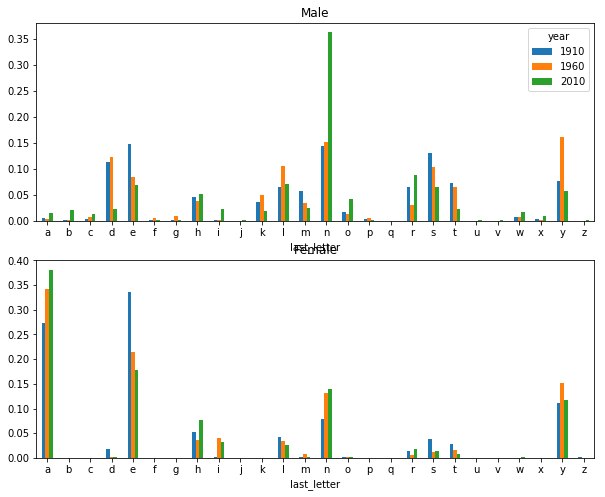

In [179]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [180]:
letter_prop = table / table.sum().astype(float)

In [181]:
dny_ts = letter_prop.ix[['d','n','y'],'M'].T

C:\Users\24225\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [182]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


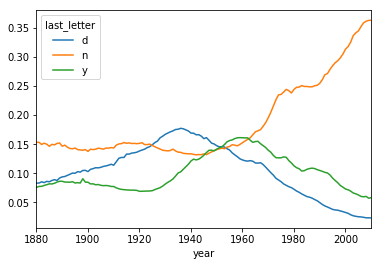

In [183]:
dny_ts.plot()

In [193]:
all_names = top1000.name.unique()

In [194]:
import numpy as np
mask = np.array(['lesl' in x.lower() for x in all_names])

In [195]:
lesley_like = all_names[mask]

In [196]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [198]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [201]:
table = filtered.pivot_table('births',index = 'year',colums = 'sex',aggfunc = 'sum')

TypeError: pivot_table() got an unexpected keyword argument 'colums'